## Analisis EDA post consolidacion de datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import sys
import re

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Data/tani_consolidado_vf.csv')

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_29087/135483940.py:1: DtypeWarning: Columns (7,8,9,20,22,23,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/tani_consolidado_vf.csv')


In [3]:
df.head()

,Fecha,N_HC,Tipo_Paciente,Categoría,Sexo,Edad,N_Control,Peso,Talla,CabPC,Diag_Nacimiento,P/T,T/E,P/E,Ganancia_Peso_Talla,Dx_Nutricional,CN-CA,Mantiene_Diag_Fav/Desf,Recuperado,Lactancia,Razón,ACA,Tam_para,Tam_graha,Tam_hb,Acompaña_control,Enfermera,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc
0,2014-10-01,57921.0,CRED,N,M,1m,1.0,4.18,53.4,37,Normal,+-1,+-1,-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,EP,NaN,SI,SI,SI
1,2014-11-06,57921.0,CRED,C,M,2m,2.0,5.53,57.6,38,Normal,+-1,+-1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,8,EP,NaN,SI,SI,SI
2,2014-12-03,57921.0,CRED,C,M,3m,3.0,6.32,61.2,39,Normal,+1,+1,+-1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,Recup,NaN,SI,SI,SI
3,2015-01-05,57921.0,CRED,C,M,4m,4.0,7.09,64.0,39.5,Normal,+-1,+1,+1,GAP-GAT,Normal,NE,Fav,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,2,SI,NaN,SI,SI,SI
4,2015-02-02,57921.0,CRED,C,M,5m,5.0,7.61,66.1,NaN,Normal,+1,+1,+1,GAP-GAT,Normal,NaN,NaN,NaN,LME,NaN,NaN,NaN,NaN,NaN,Mamá,3,SI,NaN,SI,SI,SI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454902 entries, 0 to 454901
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fecha                   454902 non-null  object 
 1   N_HC                    454902 non-null  float64
 2   Tipo_Paciente           454902 non-null  object 
 3   Categoría               454902 non-null  object 
 4   Sexo                    454902 non-null  object 
 5   Edad                    454902 non-null  object 
 6   N_Control               454901 non-null  float64
 7   Peso                    454893 non-null  object 
 8   Talla                   454879 non-null  object 
 9   CabPC                   278594 non-null  object 
 10  Diag_Nacimiento         454902 non-null  object 
 11  P/T                     407211 non-null  object 
 12  T/E                     407217 non-null  object 
 13  P/E                     407211 non-null  object 
 14  Ganancia_Peso_Talla 

In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [6]:
# Convierte a numérico columnas típicas (ignora las que no existan)
for c in ['N_HC','N_Control','Peso','Talla','CabPC']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

In [11]:
df.columns

Index(['Fecha', 'N_HC', 'Tipo_Paciente', 'Categoría', 'Sexo', 'Edad',
       'N_Control', 'Peso', 'Talla', 'CabPC', 'Diag_Nacimiento', 'P/T', 'T/E',
       'P/E', 'Ganancia_Peso_Talla', 'Dx_Nutricional', 'CN-CA',
       'Mantiene_Diag_Fav/Desf', 'Recuperado', 'Lactancia', 'Razón', 'ACA',
       'Tam_para', 'Tam_graha', 'Tam_hb', 'Acompaña_control', 'Enfermera',
       '(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc'],
      dtype='object')

In [12]:
df_analisis = df[['Fecha', 'N_HC', 'Tipo_Paciente', 'Categoría', 'Sexo', 'Edad',
       'N_Control', 'Peso', 'Talla', 'CabPC', 'Diag_Nacimiento']]

In [10]:
def resumen_simple_con_tipos(df):
    """
    Versión simple con tipos básicos
    """
    
    datos = []
    
    for col in df.columns:
        dtype = df[col].dtype
        
        # Clasificación simple
        if dtype in ['int64', 'float64']:
            tipo = 'Numérica'
        elif dtype == 'object':
            tipo = 'Categórica/Objeto'
        elif 'datetime' in str(dtype):
            tipo = 'Fecha'
        else:
            tipo = 'Otro'
        
        datos.append({
            'CAMPO': col,
            'TIPO': tipo,
            '#Registros': len(df),
            '#Nulos': df[col].isnull().sum(),
            '%Nulos': f"{(df[col].isnull().sum()/len(df)*100):.1f}%",
            '#Únicos': df[col].nunique(),
            'Min': df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else "-",
            'Max': df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else "-"
        })
    
    return pd.DataFrame(datos)

In [13]:
# Usar versión simple
tabla_simple = resumen_simple_con_tipos(df_analisis)
tabla_simple

,CAMPO,TIPO,#Registros,#Nulos,%Nulos,#Únicos,Min,Max
0,Fecha,Fecha,454902,0,0.0%,4456,-,-
1,N_HC,Numérica,454902,0,0.0%,32011,0.0,95801.0
2,Tipo_Paciente,Categórica/Objeto,454902,0,0.0%,4,-,-
3,Categoría,Categórica/Objeto,454902,0,0.0%,10,-,-
4,Sexo,Categórica/Objeto,454902,0,0.0%,4,-,-
5,Edad,Categórica/Objeto,454902,0,0.0%,1003,-,-
6,N_Control,Numérica,454902,1,0.0%,15,0.0,14.0
7,Peso,Numérica,454902,32,0.0%,4459,0.09,130020.0
8,Talla,Numérica,454902,70,0.0%,986,0.4,9500.0
9,CabPC,Numérica,454902,179251,39.4%,346,3.0,4305.0


In [31]:
print(df_analisis['edad_meses'].min())
print(df_analisis['edad_meses'].max())


0.0
65.0


In [14]:
df['Edad'].value_counts()

Edad
2m        24670
4m        24526
6m        24121
3m        23994
5m        23225
          ...  
1md           1
9m5d          1
2a6m9d        1
11m4d         1
2A8M          1
Name: count, Length: 1003, dtype: int64

In [15]:
# Gráfico con porcentajes en las barras
def grafico_barras_con_porcentajes(df, variable):
    
    plt.figure(figsize=(10, 6))
    
    # Calcular frecuencias y porcentajes
    conteos = df[variable].value_counts()
    porcentajes = df[variable].value_counts(normalize=True) * 100
    
    # Crear gráfico
    ax = conteos.plot(kind='bar', color='lightcoral')
    
    # Añadir porcentajes en cada barra
    for i, v in enumerate(conteos.values):
        ax.text(i, v + max(conteos)*0.01, f'{porcentajes.iloc[i]:.1f}%', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

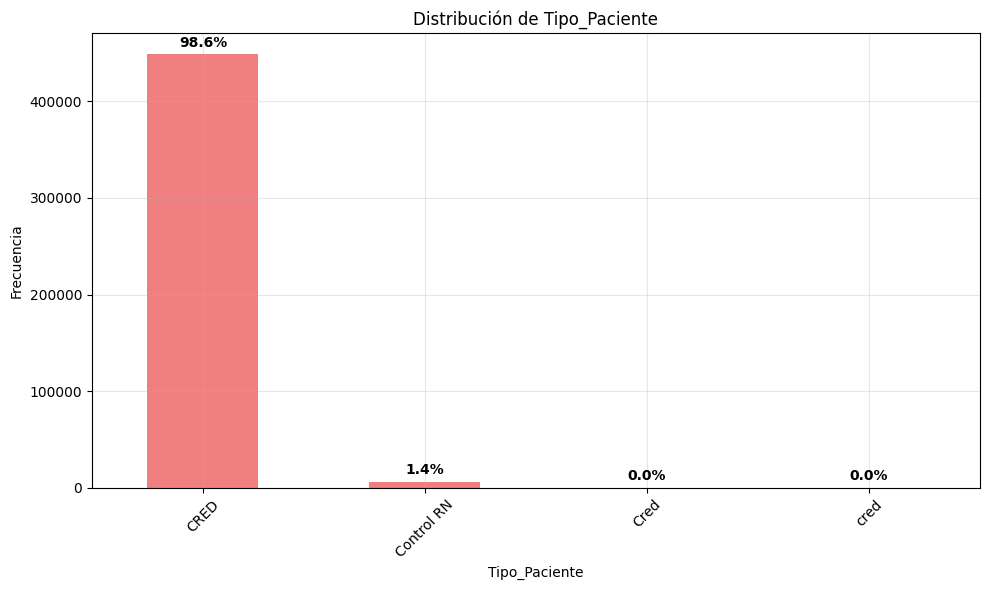

In [16]:
# Usar función
grafico_barras_con_porcentajes(df_analisis, 'Tipo_Paciente')

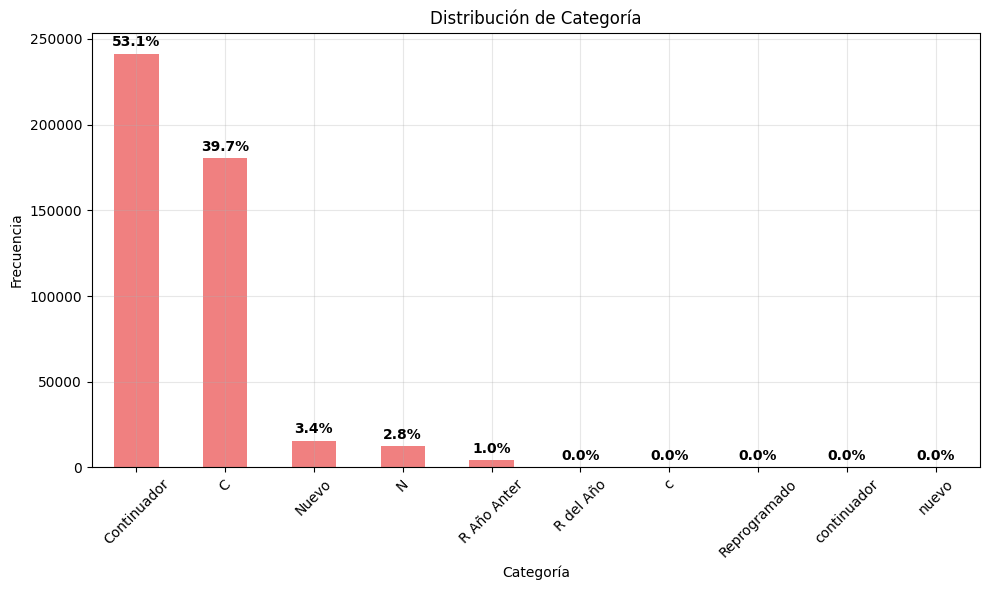

In [17]:
grafico_barras_con_porcentajes(df_analisis, 'Categoría')

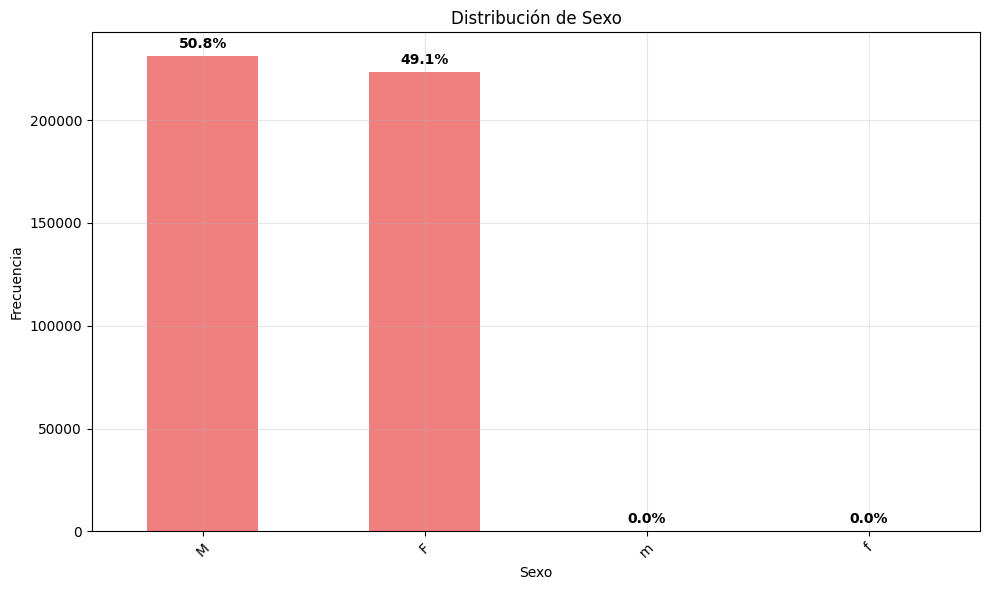

In [18]:
grafico_barras_con_porcentajes(df_analisis, 'Sexo')

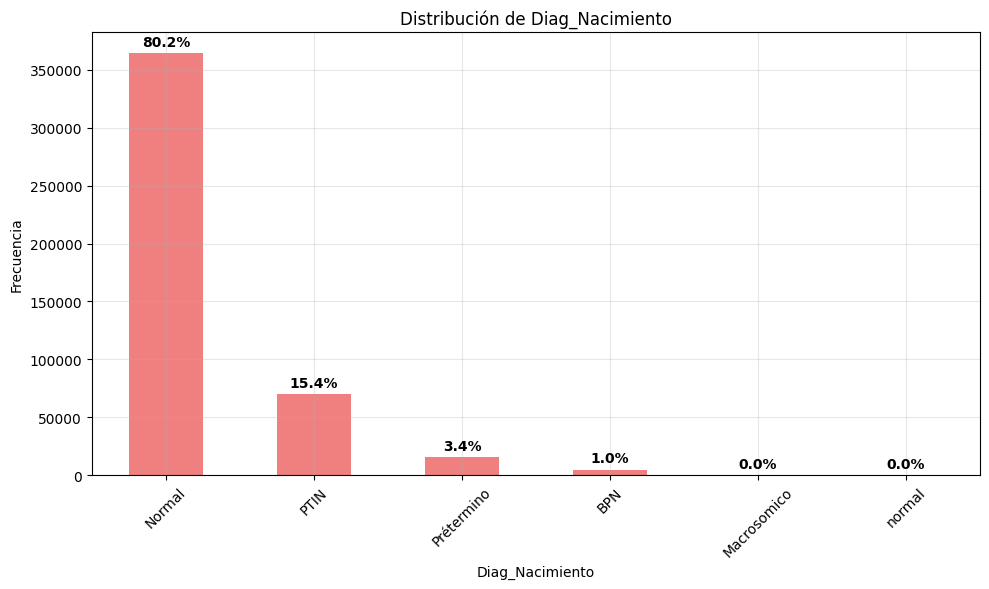

In [19]:
grafico_barras_con_porcentajes(df_analisis, 'Diag_Nacimiento')

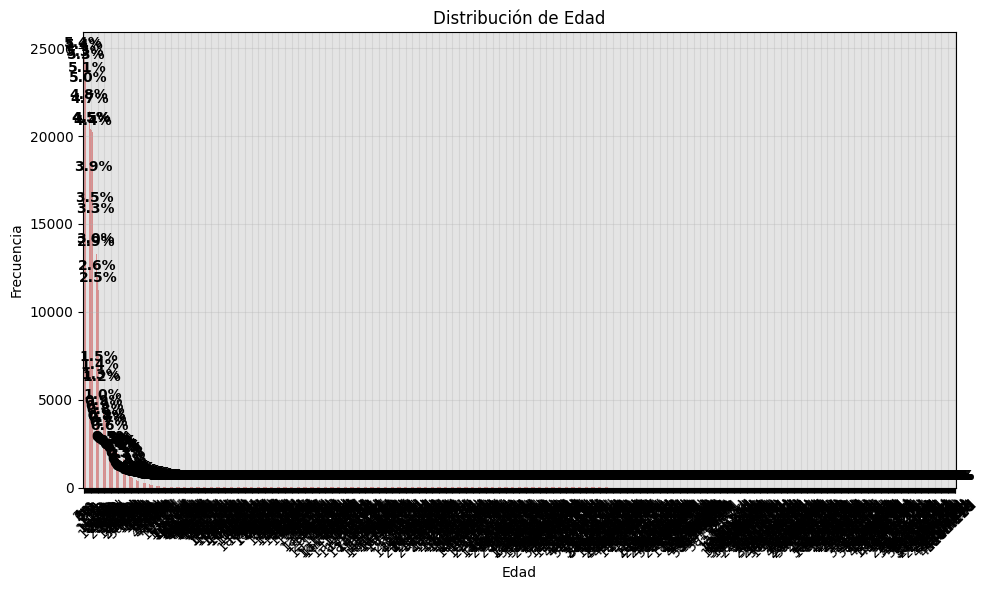

In [20]:
grafico_barras_con_porcentajes(df_analisis, 'Edad')

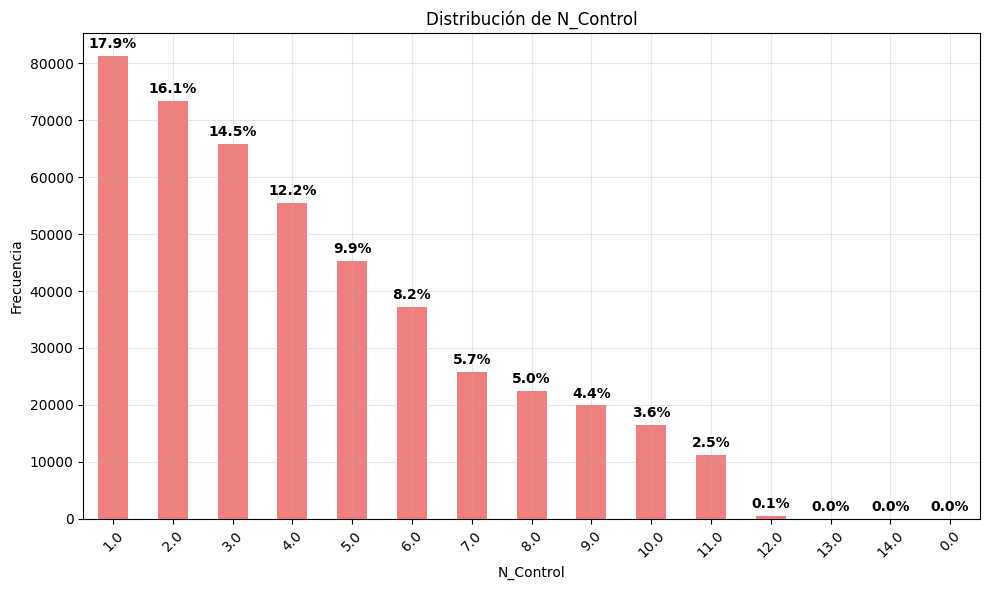

In [29]:
grafico_barras_con_porcentajes(df_analisis, 'N_Control')

In [22]:
def edad_a_meses(s):
    """
    Convierte diferentes formatos de edad a meses.
    
    Formatos soportados:
    - "1a8m" -> 1 año 8 meses = 20 meses
    - "2a" -> 2 años = 24 meses  
    - "11m" -> 11 meses
    - "28d" -> 28 días = ~0.93 meses
    - "1a2m15d" -> 1 año 2 meses 15 días = ~14.5 meses
    - "11" (solo número) -> 11 meses
    
    Returns:
        float: Edad en meses (con decimales para días)
    """
    if pd.isna(s): 
        return np.nan
    
    s = str(s).lower().strip()
    
    # Buscar años, meses y días usando regex
    a = re.search(r'(\d+)\s*a', s)  # años
    m = re.search(r'(\d+)\s*m', s)  # meses  
    d = re.search(r'(\d+)\s*d', s)  # días
    
    # Extraer valores (0 si no se encuentra)
    anios = int(a.group(1)) if a else 0
    meses = int(m.group(1)) if m else 0
    dias = int(d.group(1)) if d else 0
    
    # Convertir todo a meses
    # 1 año = 12 meses, 1 mes ≈ 30.44 días (promedio)
    meses_totales = anios * 12 + meses + dias / 30.44
    
    return round(meses_totales, 2)

In [23]:
# Se convierte la edad categorica a numérica en meses
if 'Edad' in df_analisis.columns:
    df_analisis['edad_meses'] = df_analisis['Edad'].apply(edad_a_meses)

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_29087/1611829814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisis['edad_meses'] = df_analisis['Edad'].apply(edad_a_meses)


In [24]:
def histogramas_nutricionales_5vars(df):
    # Probar diferentes nombres para la variable de control
    variables_base = ['Peso', 'Talla', 'CabPC', 'edad_meses']
    
    # Buscar la variable de control correcta
    if 'N_Control' in df.columns:
        quinta_var = 'N_Control'
    elif 'controles_previos' in df.columns:
        quinta_var = 'controles_previos'
    elif 'N_Control_1' in df.columns:
        quinta_var = 'N_Control_1'
    else:
        quinta_var = None
        print("No se encontró variable de control")
    
    if quinta_var:
        variables = variables_base + [quinta_var]
    else:
        variables = variables_base
    
    # Ajustar grid según número de variables
    if len(variables) == 4:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    else:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    axes = axes.ravel()
    
    for i, var in enumerate(variables):
        data = df[var].dropna()
        
        # Histograma básico
        axes[i].hist(data, 50)
        
        # Líneas verticales
        mean_val = data.mean()
        median_val = data.median()
        
        axes[i].axvline(mean_val, color='red', linestyle='--')
        axes[i].axvline(median_val, color='green', linestyle='--')
        
        axes[i].set_title('Distribución de ' + var)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(True)
        
        # Estadísticas
        axes[i].text(0.7, 0.9, 'Media: ' + str(round(mean_val, 2)), transform=axes[i].transAxes)
        axes[i].text(0.7, 0.85, 'Mediana: ' + str(round(median_val, 2)), transform=axes[i].transAxes)
        axes[i].text(0.7, 0.8, 'n: ' + str(len(data)), transform=axes[i].transAxes)
    
    # Ocultar subplots vacíos
    for j in range(len(variables), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()



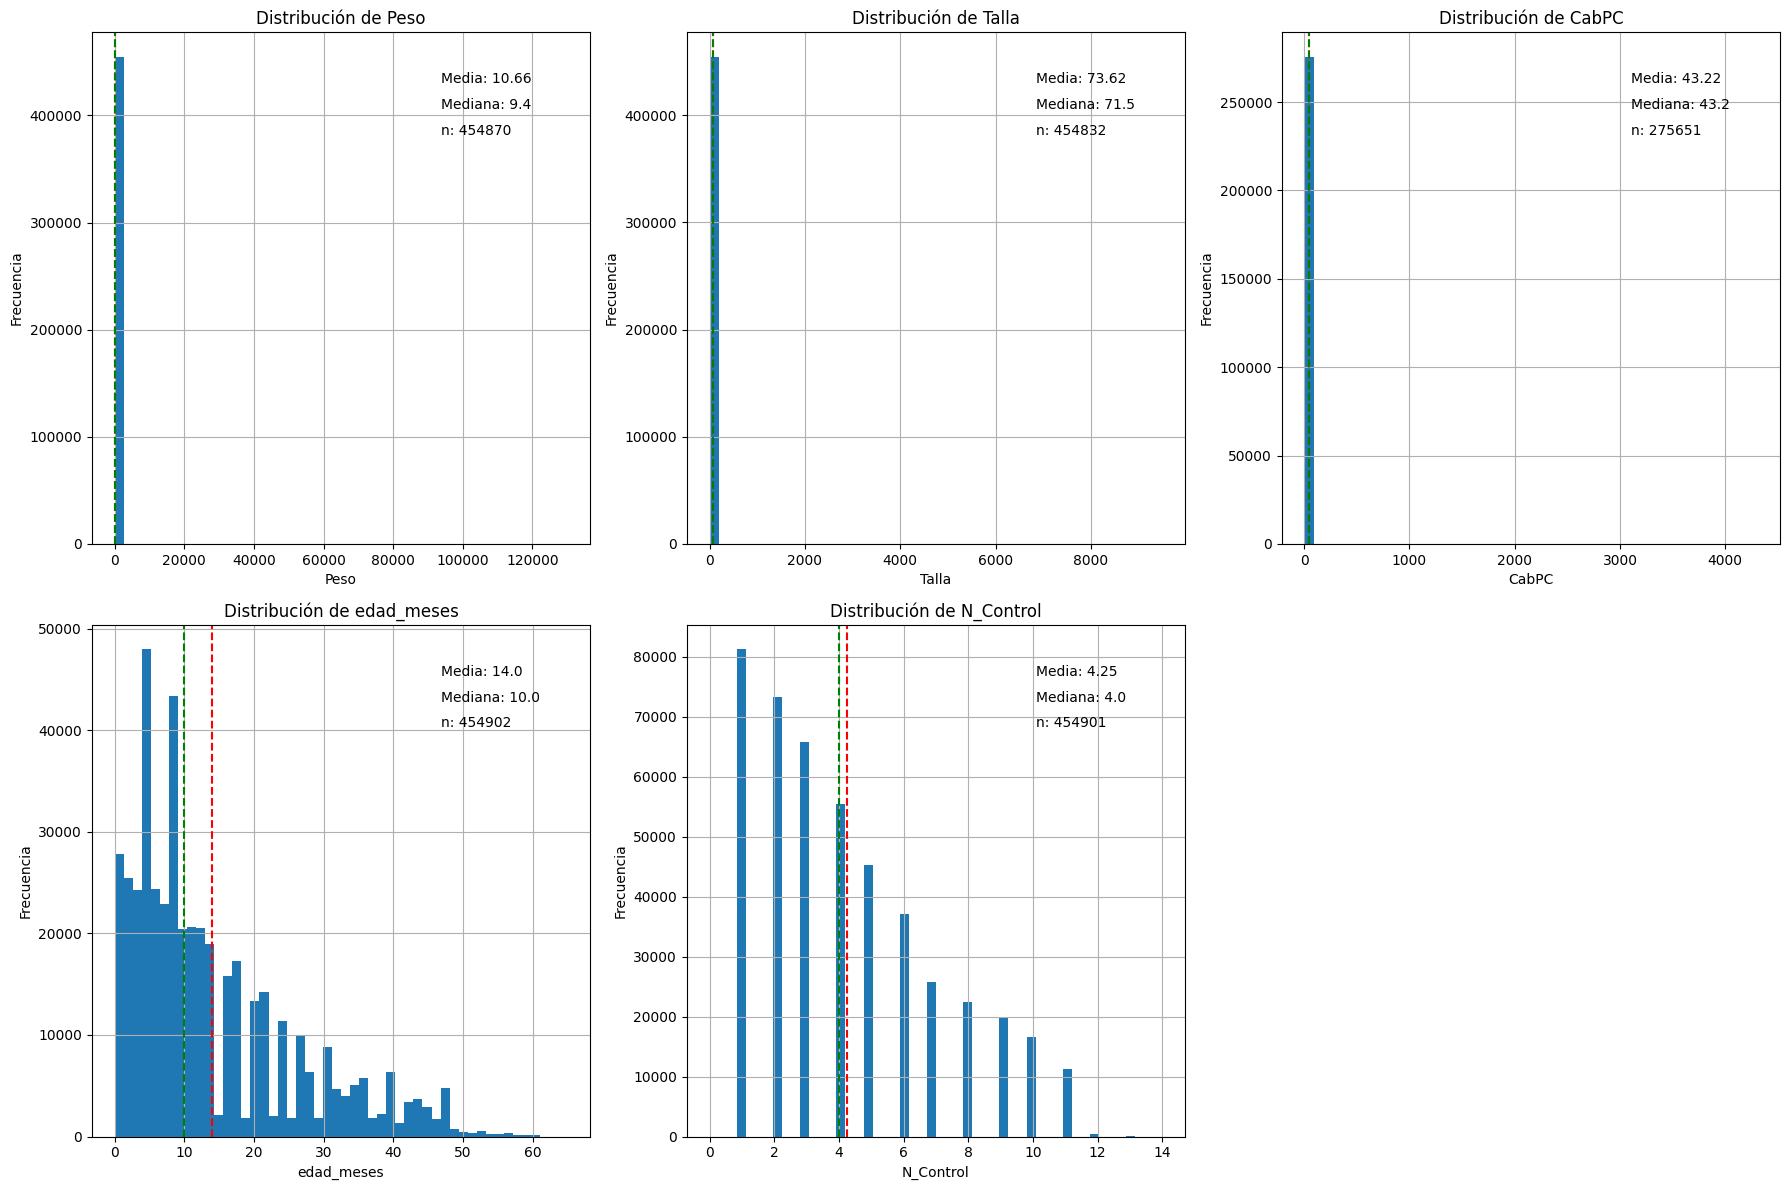

In [25]:
# Ejecutar
histogramas_nutricionales_5vars(df_analisis)

In [27]:
# Box plots para variables nutricionales
def boxplots_nutricionales(df):
    variables = ['Peso', 'Talla', 'CabPC', 'edad_meses', 'N_Control']
    variables = [var for var in variables if var in df.columns]
    
    fig, axes = plt.subplots(1, len(variables), figsize=(4*len(variables), 6))
    if len(variables) == 1:
        axes = [axes]
    
    for i, var in enumerate(variables):
        data = df[var].dropna()
        
        # Boxplot
        bp = axes[i].boxplot(data, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        
        axes[i].set_title(f'Box Plot - {var}')
        axes[i].set_ylabel(var)
        axes[i].grid(True, alpha=0.3)
        
        # Identificar outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers_count = len(data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)])
        
        # Estadísticas en el gráfico
        textstr = f'Outliers: {outliers_count} ({outliers_count/len(data)*100:.1f}%)'
        axes[i].text(0.02, 0.98, textstr, transform=axes[i].transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

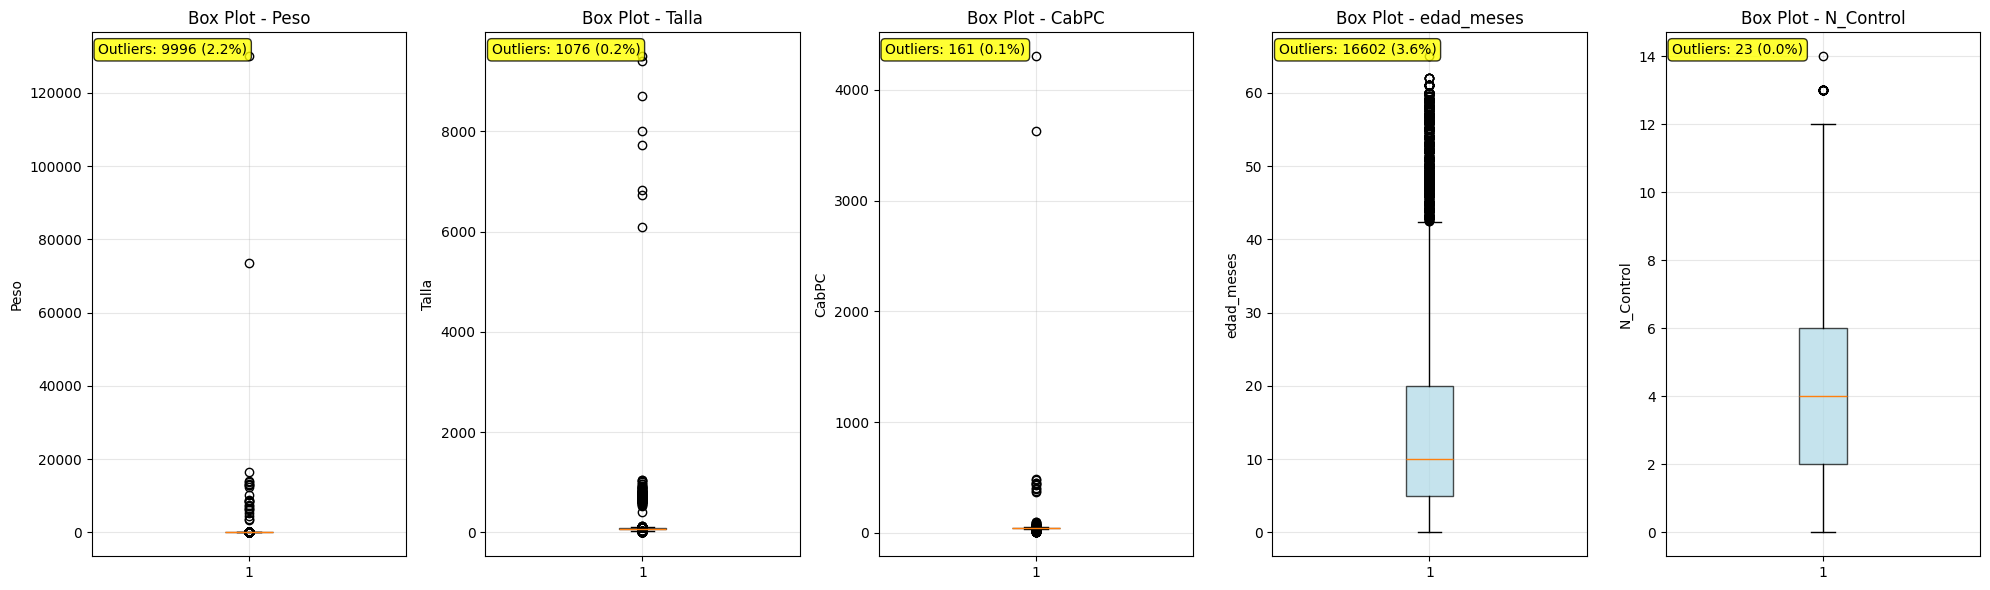

In [28]:
boxplots_nutricionales(df_analisis)